In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [2]:
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')
credit_data = pd.read_csv('../data/creditcard.csv')

In [3]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# Display information about each dataset
print("Fraud Data Info:")
fraud_data.info()


print("\nIP Data Info:")
ip_data.info()



Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  category      
 6   browser         151112 non-null  category      
 7   sex             151112 non-null  category      
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: category(3), datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 9.7+ MB

IP Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138

In [15]:
print("\nCredit Data Info:")
credit_data.info()



Credit Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 

In [16]:
# Check for missing values in fraud_data
print("Check for missing values in fraud_data")
print(fraud_data.isnull().sum())

# Check credit_data missing values
print("Check for missing values in credit_data")
print(credit_data.isnull().sum())

# Check ip_address missing values
print("Check for missing values inip_address data")
print(ip_data.isnull().sum())


Check for missing values in fraud_data
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Check for missing values in credit_data
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Check for missing values inip_address data
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [17]:
# Remove duplicates in place
fraud_data.drop_duplicates(inplace=True)
credit_data.drop_duplicates(inplace=True)
ip_data.drop_duplicates(inplace=True)

# Confirm if duplicates are removed
print(f"Remaining duplicates in fraud_data: {fraud_data.duplicated().sum()}")
print(f"Remaining duplicates in credit_data: {credit_data.duplicated().sum()}")
print(f"Remaining duplicates in ip_data: {ip_data.duplicated().sum()}")


Remaining duplicates in fraud_data: 0
Remaining duplicates in credit_data: 0
Remaining duplicates in ip_data: 0


In [18]:
# Convert time-related columns to datetime format  
fraud_data["signup_time"] = pd.to_datetime(fraud_data["signup_time"])  
fraud_data["purchase_time"] = pd.to_datetime(fraud_data["purchase_time"])  

# Set categorical columns to appropriate data types  
fraud_data["source"] = fraud_data["source"].astype("category")  
fraud_data["browser"] = fraud_data["browser"].astype("category")  
fraud_data["sex"] = fraud_data["sex"].astype("category")  

# Display dataset summary to verify data types
print(fraud_data.dtypes)


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                  category
browser                 category
sex                     category
age                        int64
ip_address               float64
class                      int64
dtype: object


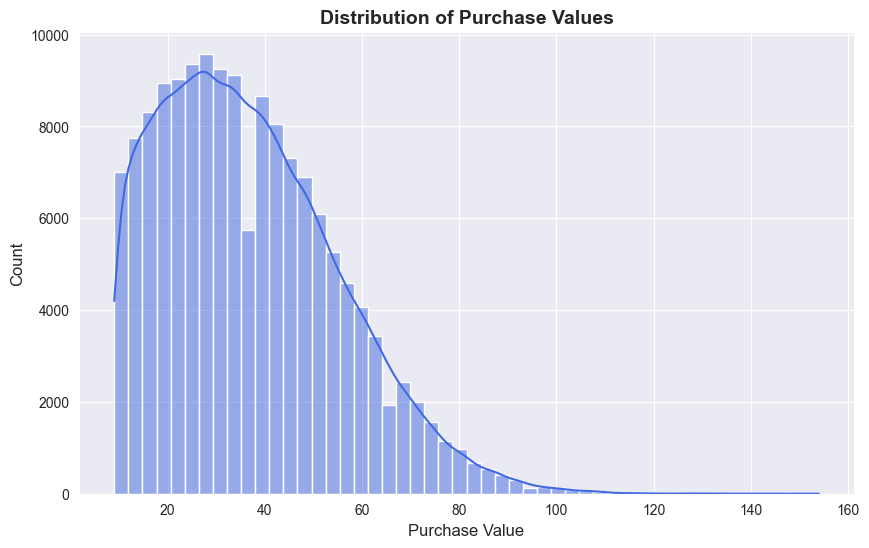

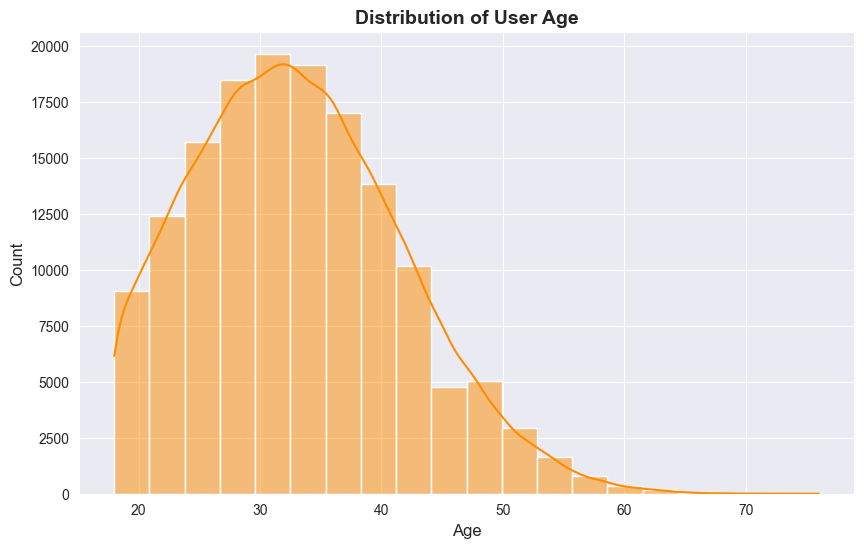

C:\Users\HP\AppData\Local\Temp\ipykernel_18404\304180555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=fraud_data, palette=["limegreen", "crimson"])


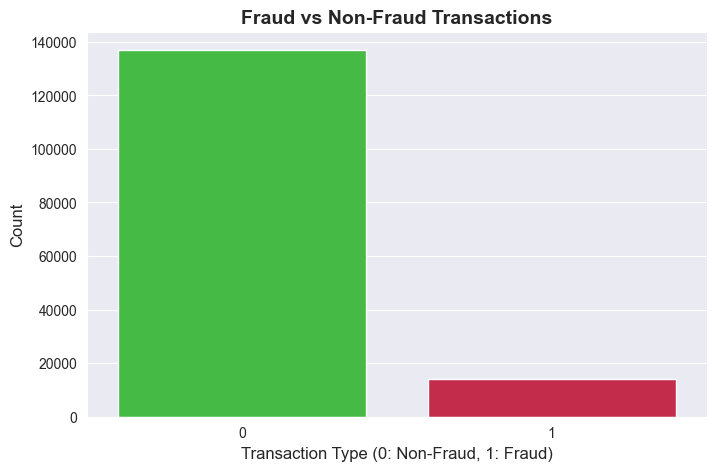

In [19]:
# Set a modern style
sns.set_style("darkgrid")

# Distribution of purchase values with new colors
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data["purchase_value"], bins=50, kde=True, color="royalblue")
plt.title("Distribution of Purchase Values", fontsize=14, fontweight="bold")
plt.xlabel("Purchase Value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Distribution of user age with a new color
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data["age"], bins=20, kde=True, color="darkorange")
plt.title("Distribution of User Age", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Countplot for fraud detection with new color palette
plt.figure(figsize=(8, 5))
sns.countplot(x="class", data=fraud_data, palette=["limegreen", "crimson"])
plt.title("Fraud vs Non-Fraud Transactions", fontsize=14, fontweight="bold")
plt.xlabel("Transaction Type (0: Non-Fraud, 1: Fraud)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


In [ ]:
def ip_to_int(ip_address):
    try:
        return int(fraud_data.ip_address(ip_address))
    except (ipaddress.AddressValueError, TypeError):  # Handle invalid IPs
        return None



In [ ]:
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].apply(ip_to_int)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].apply(ip_to_int)

In [29]:
def get_country(ip_int):
    if ip_int is None:  # Handle cases where IP conversion failed
        return None
    for index, row in ip_data.iterrows():
        if row['lower_bound_ip_address'] <= ip_int <= row['upper_bound_ip_address']:
            return row['country']
    return None  # Return None if no country is found

In [32]:
# Transaction Frequency and Velocity (Example: Transactions per day)
fraud_data['transaction_day'] = fraud_data['purchase_time'].dt.date
fraud_data['transactions_per_day'] = fraud_data.groupby('user_id')['transaction_day'].transform('count')

In [33]:

# Time-Based Features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek  # Monday=0, Sunday=6

In [34]:
# 7. Normalization and Scaling (Example: StandardScaler for purchase_value)
scaler = StandardScaler()
fraud_data['purchase_value'] = scaler.fit_transform(fraud_data[['purchase_value']])

In [35]:
# 8. Encode Categorical Features (Example: Label Encoding for source and browser)
le = LabelEncoder()
fraud_data['source'] = le.fit_transform(fraud_data['source'])
fraud_data['browser'] = le.fit_transform(fraud_data['browser'])
fraud_data['sex'] = le.fit_transform(fraud_data['sex']) #encode the sex column